In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Read the list of five-letter words from the text file
with open('words.txt', 'r') as file:
    words = [line.strip() for line in file if len(line.strip()) == 5]

# Count the frequency of each letter in the list of words
letter_counts = Counter("".join(words))

# Convert the counter to a DataFrame for better visualization
letter_counts_df = pd.DataFrame.from_dict(letter_counts, orient='index', columns=['Count']).reset_index()
letter_counts_df = letter_counts_df.rename(columns={'index': 'Letter'}).sort_values(by='Count', ascending=False)

# Display the DataFrame
print(letter_counts_df)

   Letter  Count
9       s   6664
5       e   6660
3       a   5987
18      o   4438
4       r   4158
1       i   3759
16      l   3371
8       t   3295
21      n   2952
7       u   2511
20      d   2452
10      y   2074
0       c   2028
13      p   2019
12      m   1976
11      h   1758
2       g   1644
6       b   1627
15      k   1505
17      f   1115
14      w   1039
19      v    693
25      z    434
23      j    291
24      x    288
22      q    112


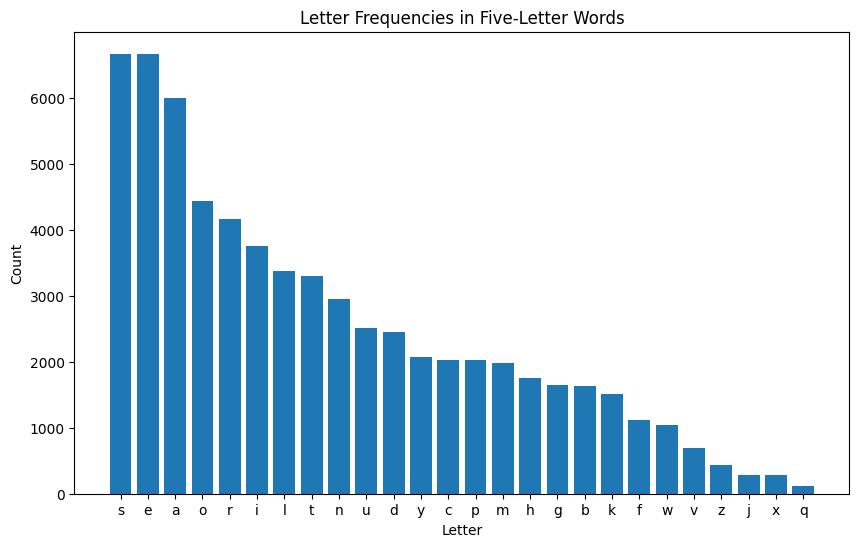

In [3]:
# Plot the letter frequencies
plt.figure(figsize=(10, 6))
plt.bar(letter_counts_df['Letter'], letter_counts_df['Count'])
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Letter Frequencies in Five-Letter Words')
plt.show()

## Use the Folling Input Format

```
criteria = {0: 's', 1: 'e'}
exclude_letters = {'f', 'i', 'y', 'c', 'o'}
exclude_positions_for_letters = {'e': [2], 'r': [4]}
```

In [4]:
from collections import Counter

# Read the list of five-letter words from the text file
def read_words(file_path):
    with open(file_path, 'r') as file:
        return [line.strip() for line in file if len(line.strip()) == 5]

# Function to filter words based on specific criteria, exclusion list, and exclude positions for certain letters
def filter_words(words, criteria, exclude_letters, exclude_positions_for_letters):
    exclude_letters_set = set(exclude_letters)

    def is_valid_word(word):
        # Check criteria for specific positions
        for position, char in criteria.items():
            if word[position] != char:
                return False
        # Exclude words containing letters from the exclude list
        if any(char in exclude_letters_set for char in word):
            return False
        # Exclude words that have specific letters in specific positions
        for letter, positions in exclude_positions_for_letters.items():
            for pos in positions:
                if word[pos] == letter:
                    return False
        return True

    return [word for word in words if is_valid_word(word)]

# Function to calculate letter frequencies for specific positions
def calculate_frequencies(words, exclude_positions):
    letter_counts = Counter()
    for word in words:
        for i, char in enumerate(word):
            if i not in exclude_positions:
                letter_counts[char] += 1
    return letter_counts

# Function to score words based on letter frequencies, duplicates, and ending letter
def score_words(words, frequencies, exclude_positions):
    def word_score(word):
        score = sum(frequencies[char] for i, char in enumerate(word) if i not in exclude_positions)
        if len(set(word)) < len(word):
            score -= 10  # Penalize words with duplicate letters
        if word[-1] == 's':
            score -= 5  # Penalize words ending in 's'
        return score
    
    return sorted(words, key=word_score, reverse=True)

# Example criteria and exclusions
criteria = {}
exclude_letters = {'d', 'i', 's', 'r', 'e', 'u'}  #'f', 'i', 'y', 'c', 'o'
exclude_positions_for_letters = {'a': [0, 2], 'e': [3, 0]}  # 'e': [2], 'r': [4]
exclude_positions = set(criteria.keys())

# Read the words from the file
words = read_words('words.txt')

# Get the filtered words
filtered_words = filter_words(words, criteria, exclude_letters, exclude_positions_for_letters)

# Calculate letter frequencies for remaining positions
frequencies = calculate_frequencies(filtered_words, exclude_positions)

# Print frequencies for debugging
print(f"Letter frequencies: {frequencies}")

# Sort the filtered words based on the letter frequencies
sorted_filtered_words = score_words(filtered_words, frequencies, exclude_positions)

# Print the sorted filtered words
print(sorted_filtered_words)

Letter frequencies: Counter({'o': 574, 'a': 565, 'y': 303, 'l': 282, 'n': 232, 't': 219, 'c': 194, 'p': 169, 'm': 164, 'b': 149, 'h': 148, 'g': 136, 'k': 107, 'w': 83, 'f': 65, 'z': 48, 'j': 34, 'v': 26, 'x': 18, 'q': 4})
['booay', 'paolo', 'yahoo', 'moola', 'baloo', 'napoo', 'potoo', 'cocoa', 'cacao', 'taboo', 'loofa', 'ovolo', 'haoma', 'baboo', 'loyal', 'pooka', 'hooka', 'onlay', 'loony', 'wahoo', 'cooly', 'nalla', 'pooja', 'bazoo', 'loopy', 'toyon', 'local', 'gazoo', 'mooly', 'calla', 'palay', 'boyla', 'talon', 'tonal', 'looby', 'notal', 'tolan', 'hooly', 'gooly', 'ology', 'kazoo', 'lotto', 'molal', 'molla', 'natal', 'palla', 'hollo', 'total', 'lotta', 'colon', 'yapon', 'gayal', 'hallo', 'holla', 'lolog', 'moony', 'octal', 'wazoo', 'cloot', 'halal', 'lahal', 'looky', 'canal', 'nopal', 'mayan', 'monal', 'nanna', 'yacca', 'booty', 'goony', 'ploat', 'hooty', 'wooly', 'copay', 'banya', 'matlo', 'molto', 'tanna', 'halon', 'lohan', 'holon', 'coomy', 'tanto', 'talpa', 'bloat', 'logan', 'lo

# Word Freqs

In [5]:
from wordfreq import word_frequency

# Function to get the frequency and rank of a word
def get_word_rank(word):
    # Get the word frequency for the "en" (English) language
    freq = word_frequency(word, 'en')
    
    # Rank the word based on its frequency
    if freq > 0:
        rank = round(-1 / freq)
    else:
        rank = None
    
    return freq, rank

# Words to compare
words = ["cigar",
            "rebut",
            "sissy",
            "humph",
            "awake",
            "blush",
            "focal",
            "evade",
            "naval",
            "serve",
            "heath",
            "dwarf",
            "model",
            "karma",
            "stink",
            "grade",
            "quiet"]

# Get frequency and rank for each word
for word in words:
    freq, rank = get_word_rank(word)
    print(f"Word: {word}, Frequency: {freq}, Rank: {rank}")

Word: cigar, Frequency: 3.72e-06, Rank: -268817
Word: rebut, Frequency: 3.98e-07, Rank: -2512563
Word: sissy, Frequency: 1.7e-06, Rank: -588235
Word: humph, Frequency: 1.51e-07, Rank: -6622517
Word: awake, Frequency: 1.38e-05, Rank: -72464
Word: blush, Frequency: 3.63e-06, Rank: -275482
Word: focal, Frequency: 4.68e-06, Rank: -213675
Word: evade, Frequency: 2.45e-06, Rank: -408163
Word: naval, Frequency: 1.74e-05, Rank: -57471
Word: serve, Frequency: 7.08e-05, Rank: -14124
Word: heath, Frequency: 5.75e-06, Rank: -173913
Word: dwarf, Frequency: 5.62e-06, Rank: -177936
Word: model, Frequency: 0.000135, Rank: -7407
Word: karma, Frequency: 7.59e-06, Rank: -131752
Word: stink, Frequency: 2.88e-06, Rank: -347222
Word: grade, Frequency: 6.31e-05, Rank: -15848
Word: quiet, Frequency: 4.47e-05, Rank: -22371


In [6]:
from wordfreq import top_n_list

# Get the top 100,000 words in English
top_words = top_n_list('en', 100000)

# Function to get the rank of a word
def get_word_rank(word):
    try:
        return top_words.index(word) + 1
    except ValueError:
        return None  # Word not found in the top list

# Words to compare
words = ["cigar",
            "rebut",
            "sissy",
            "humph",
            "awake",
            "blush",
            "focal",
            "evade",
            "naval",
            "serve",
            "heath",
            "dwarf",
            "model",
            "karma",
            "stink",
            "grade",
            "quiet"]

# Get rank for each word
for word in words:
    rank = get_word_rank(word)
    print(f"Word: {word}, Rank: {rank}")

Word: cigar, Rank: 13479
Word: rebut, Rank: 47289
Word: sissy, Rank: 21657
Word: humph, Rank: 76867
Word: awake, Rank: 5658
Word: blush, Rank: 13671
Word: focal, Rank: 11697
Word: evade, Rank: 17362
Word: naval, Rank: 4779
Word: serve, Rank: 1502
Word: heath, Rank: 10221
Word: dwarf, Rank: 10355
Word: model, Rank: 775
Word: karma, Rank: 8563
Word: stink, Rank: 15922
Word: grade, Rank: 1660
Word: quiet, Rank: 2267
